In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

np.random.seed(42)

In [5]:
data_path="DataSets/global_cancer_patients_2015_2024.csv"
df=pd.read_csv(data_path,encoding='ascii',delimiter=',')


print("shape of dataset  : ",df.shape )
print("columns           : ",df.columns.to_list())


df.head()

shape of dataset  :  (50000, 15)
columns           :  ['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']


Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.92  
1            12573.41             4.7                   4.65  
2             6984.33             7.1                   5.84  
3            67446.25             1.6                   3.12  
4            77977.12             2.9                   3.62

In [6]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


In [7]:
df['Year']=pd.to_datetime(df['Year'],format="%Y")

In [8]:
df.dtypes

Patient_ID                       object
Age                               int64
Gender                           object
Country_Region                   object
Year                     datetime64[ns]
Genetic_Risk                    float64
Air_Pollution                   float64
Alcohol_Use                     float64
Smoking                         float64
Obesity_Level                   float64
Cancer_Type                      object
Cancer_Stage                     object
Treatment_Cost_USD              float64
Survival_Years                  float64
Target_Severity_Score           float64
dtype: object

In [9]:
df.nunique()

Patient_ID               50000
Age                         70
Gender                       3
Country_Region              10
Year                        10
Genetic_Risk               101
Air_Pollution              101
Alcohol_Use                101
Smoking                    101
Obesity_Level              101
Cancer_Type                  8
Cancer_Stage                 5
Treatment_Cost_USD       49861
Survival_Years             101
Target_Severity_Score      744
dtype: int64

In [10]:
categorical_columns=['Patient_ID', 'Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
for col in categorical_columns:
    df[col]=df[col].astype('category')

In [11]:
df.dtypes

Patient_ID                     category
Age                               int64
Gender                         category
Country_Region                 category
Year                     datetime64[ns]
Genetic_Risk                    float64
Air_Pollution                   float64
Alcohol_Use                     float64
Smoking                         float64
Obesity_Level                   float64
Cancer_Type                    category
Cancer_Stage                   category
Treatment_Cost_USD              float64
Survival_Years                  float64
Target_Severity_Score           float64
dtype: object

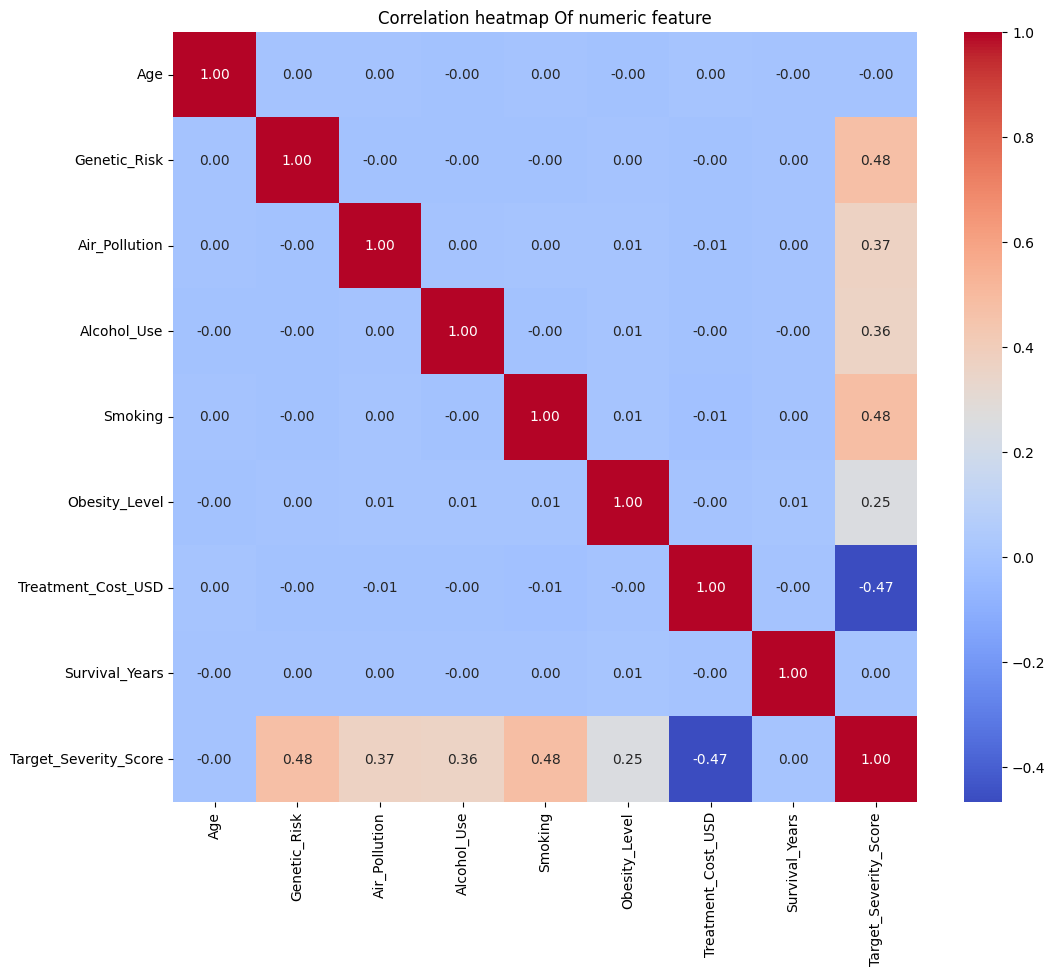

In [12]:
numeric_df=df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(12,10))
    corr=numeric_df.corr()
    sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
    plt.title("Correlation heatmap Of numeric feature")
    plt.show()
else:
    print("Not Enough numeric columns available for heatmap")

Text(0.5, 0.98, 'pair plot of numeric features')

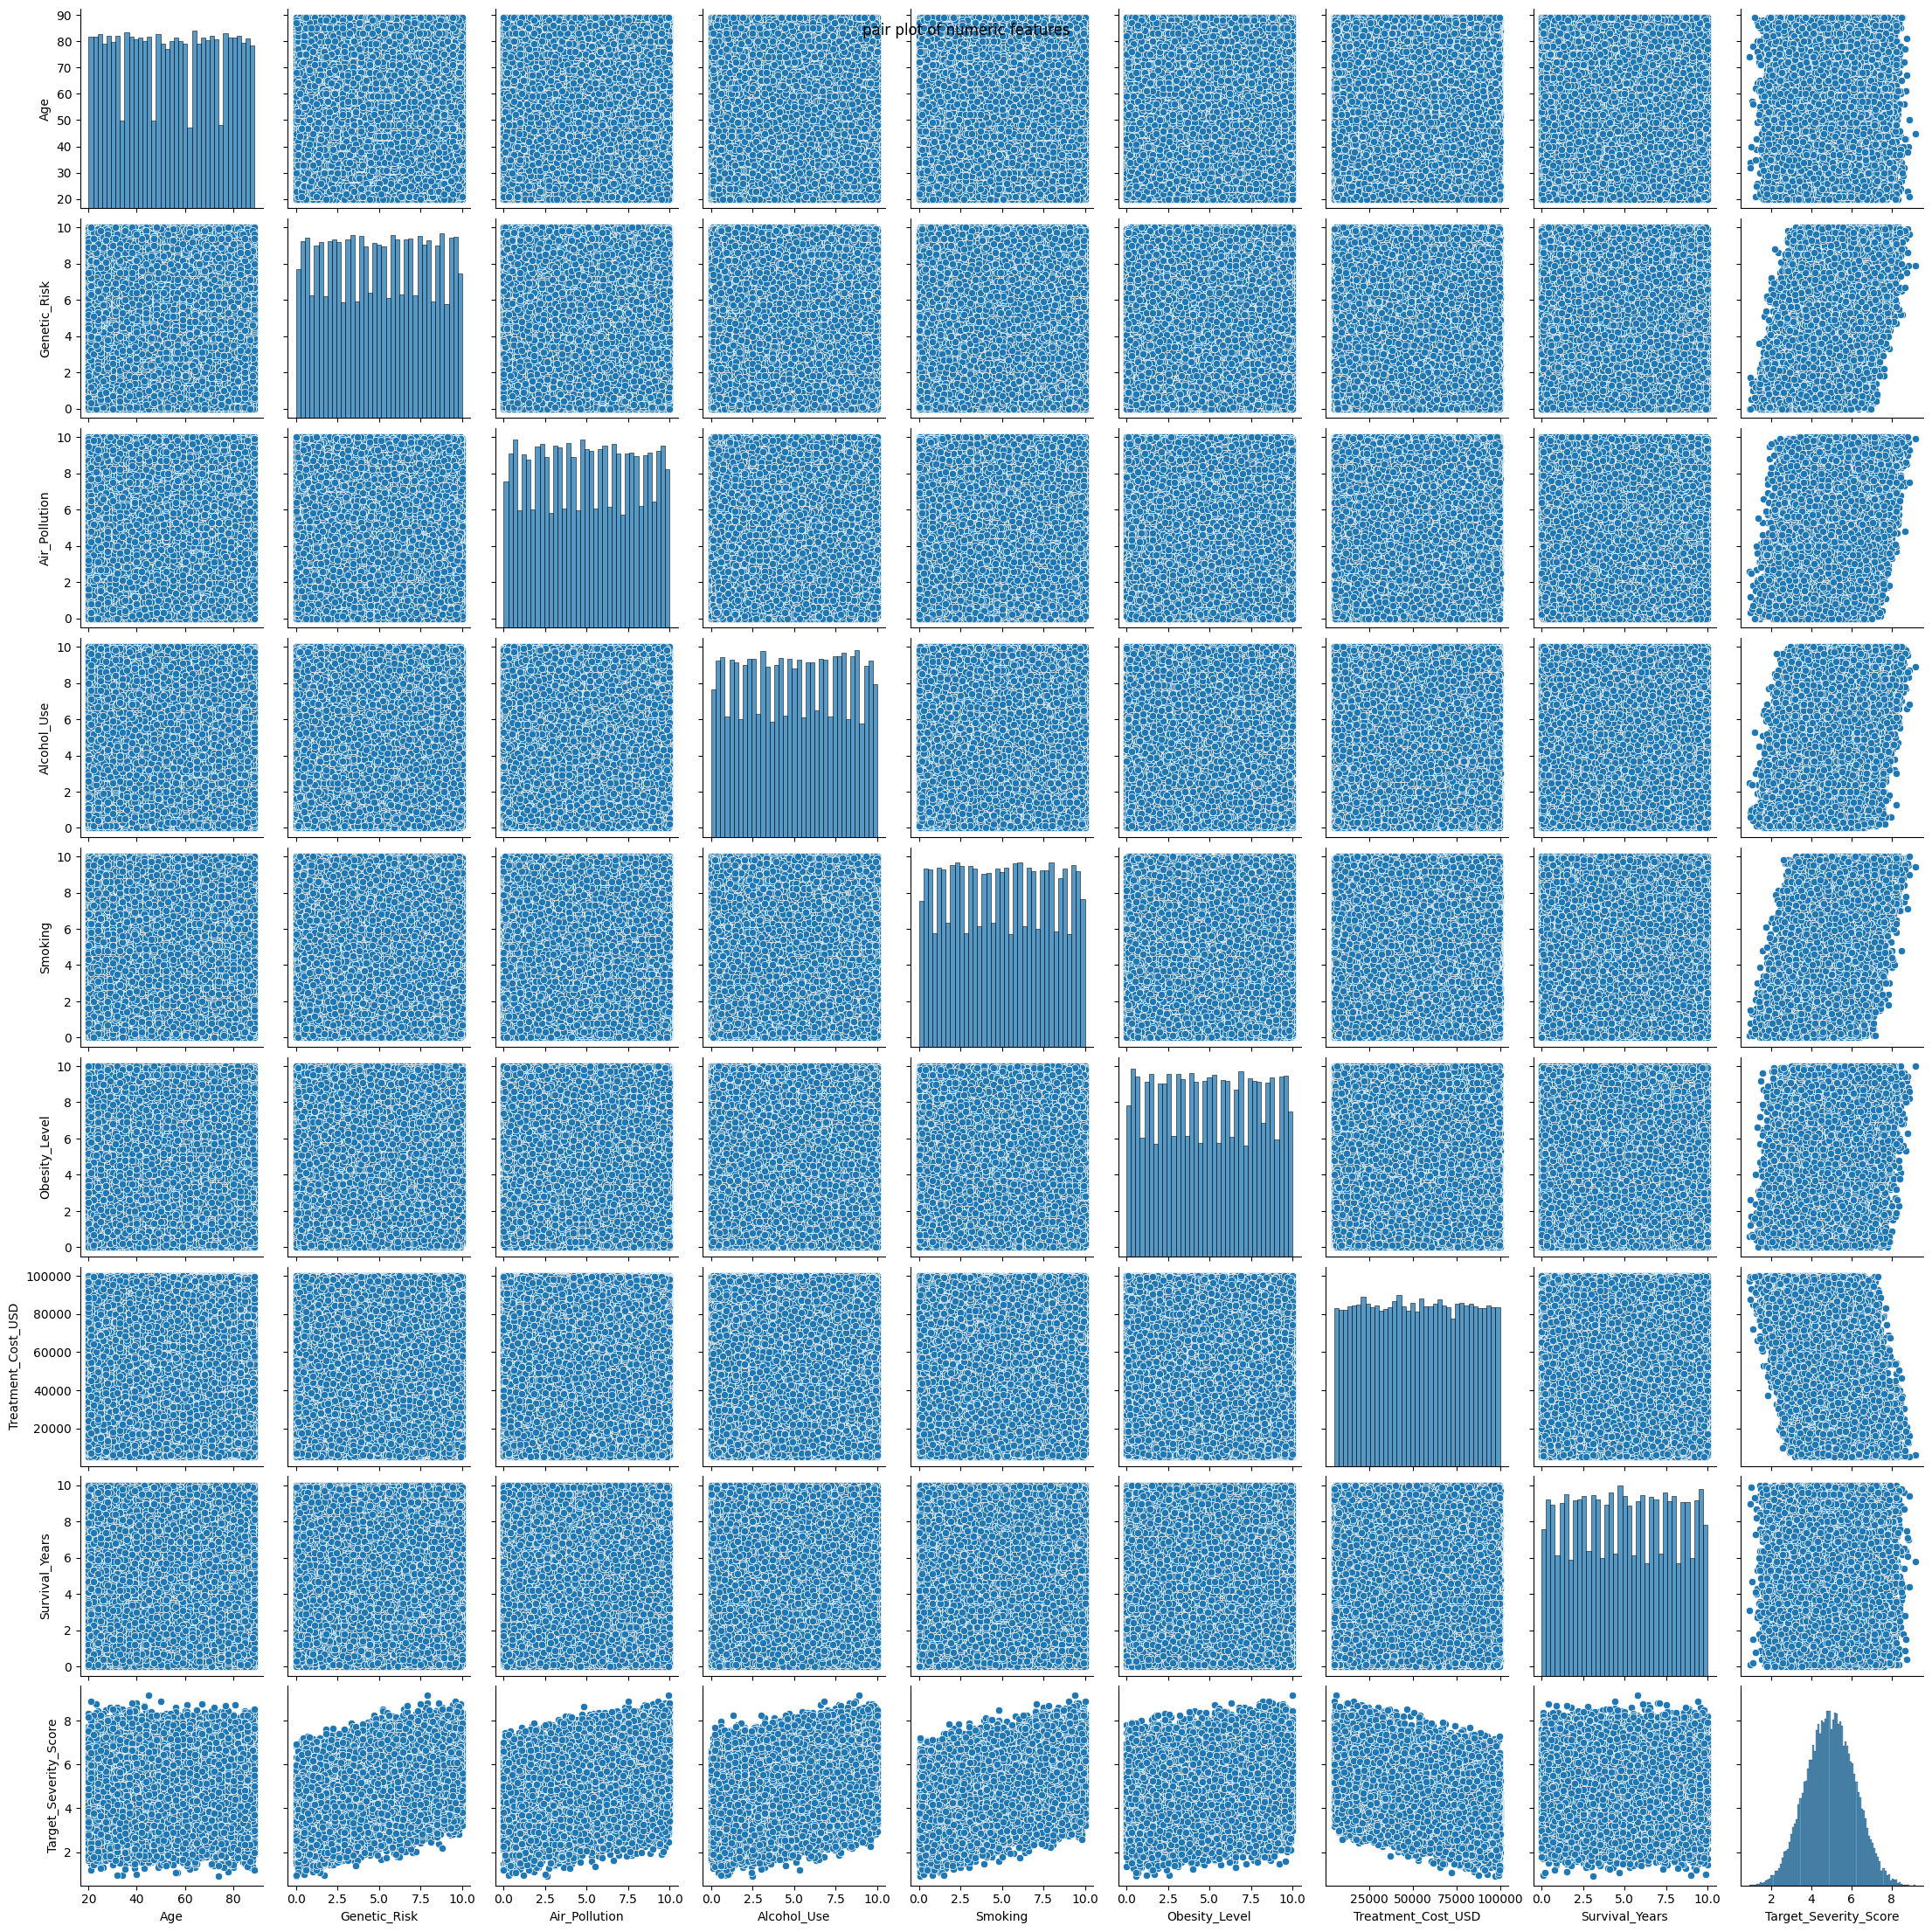

In [13]:
sns.pairplot(numeric_df.dropna())
plt.suptitle("pair plot of numeric features")

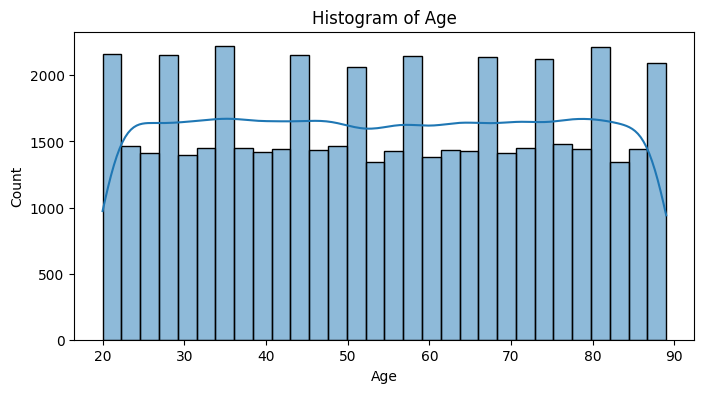

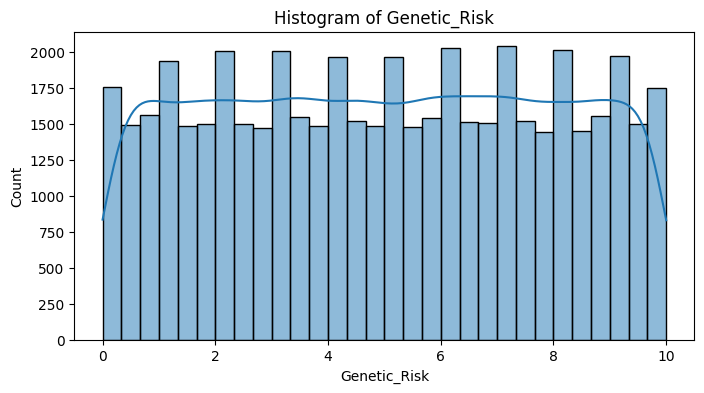

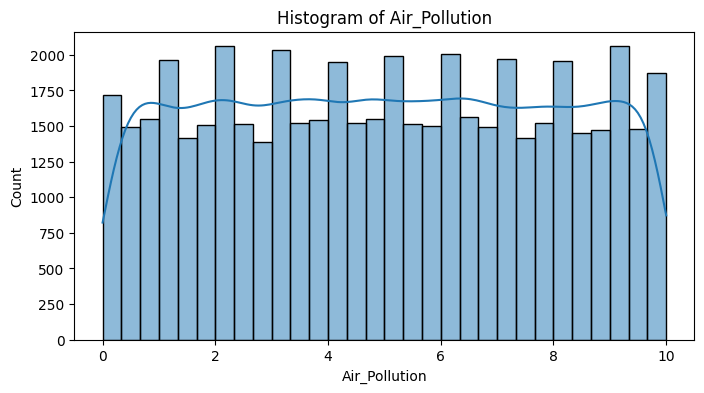

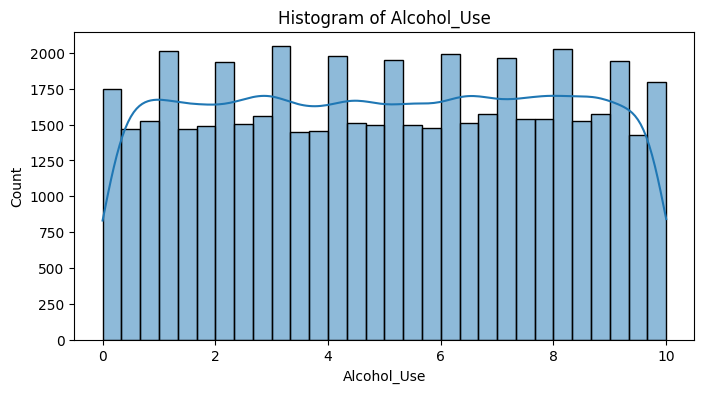

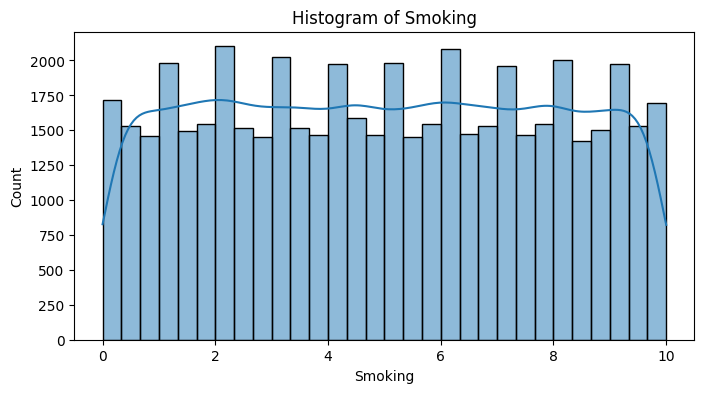

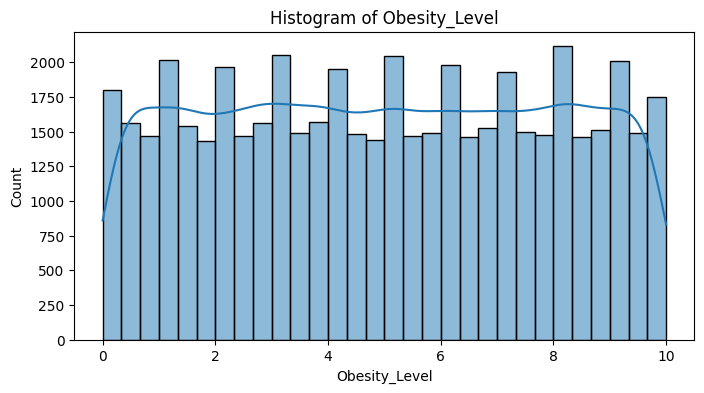

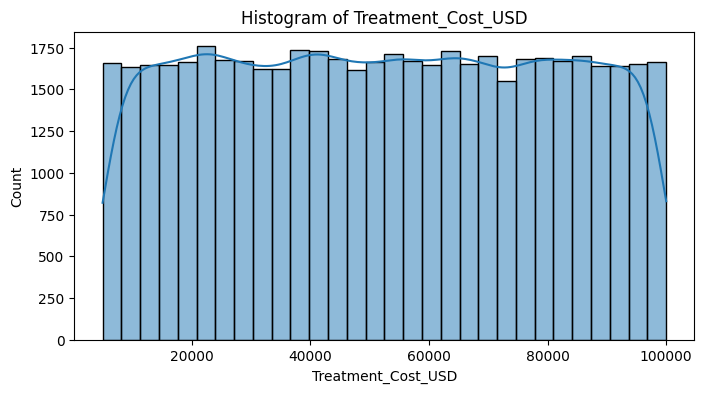

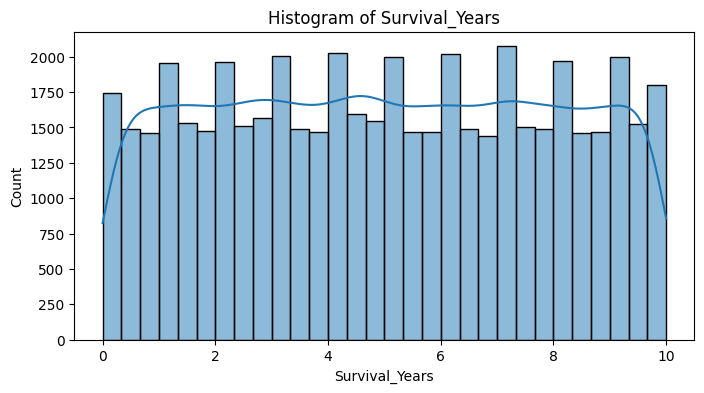

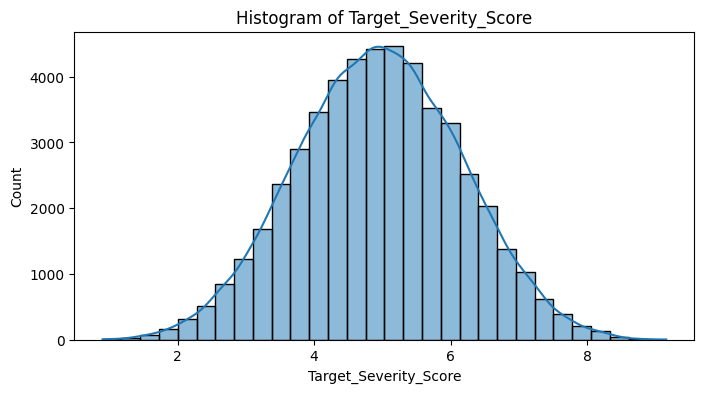

In [14]:
numeric_cols = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(),kde=True,bins=30)
        plt.title(f'Histogram of {col}')
        plt.show()

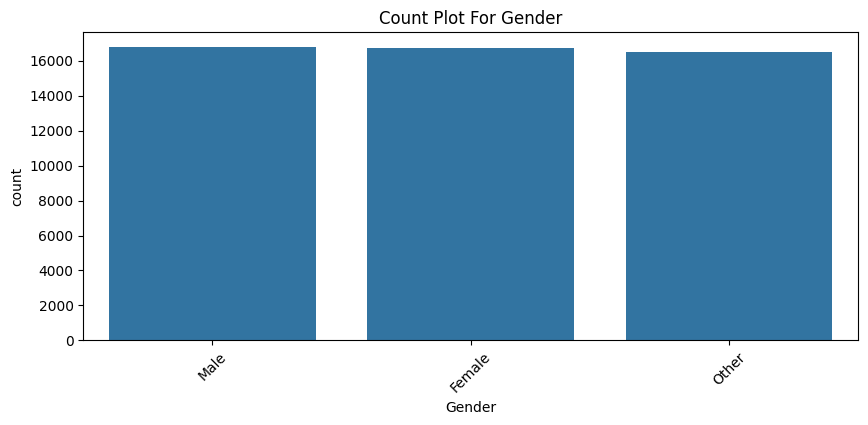

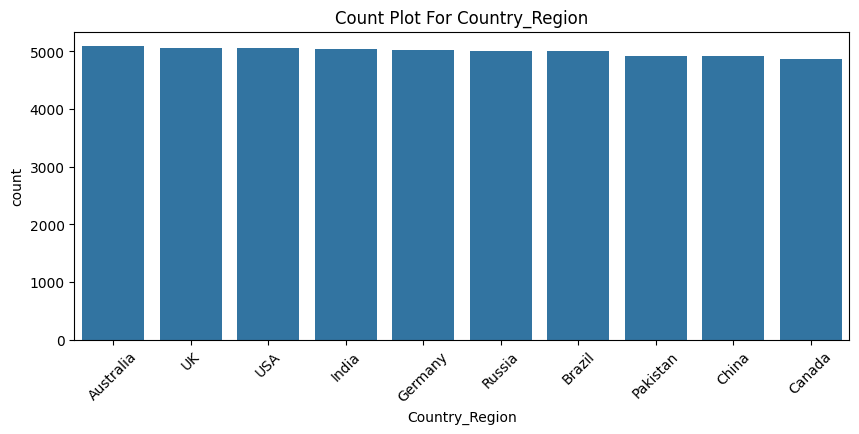

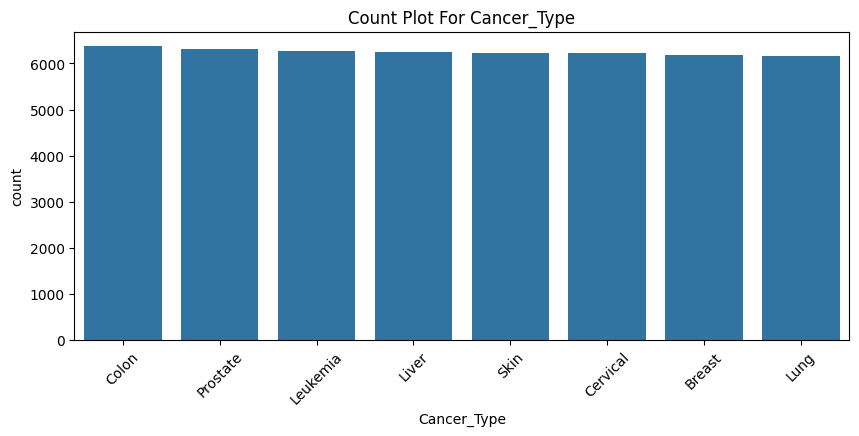

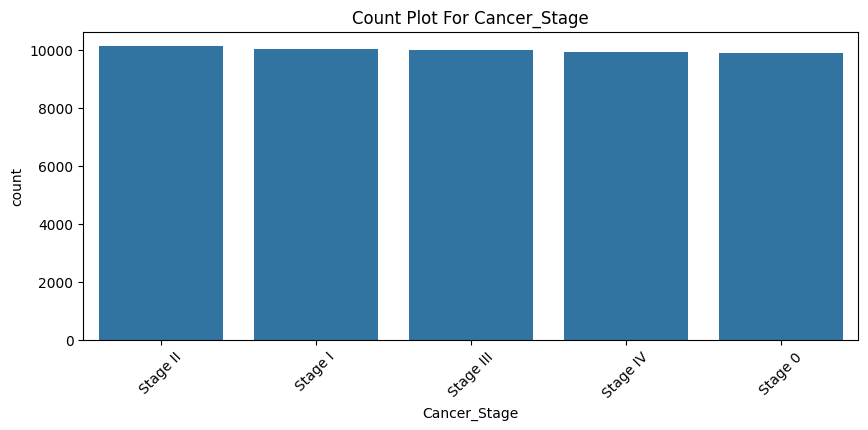

In [15]:
categorical_vars = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
for col in categorical_vars:
    if col in df.columns:
        plt.figure(figsize=(10,4))
        sns.countplot(data=df,x=col,order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Count Plot For {col}")
        plt.show()

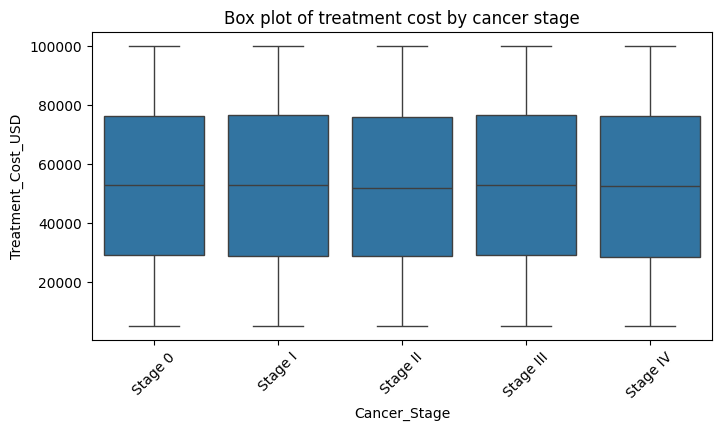

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Cancer_Stage',y='Treatment_Cost_USD',data=df)
plt.xticks(rotation=45)
plt.title("Box plot of treatment cost by cancer stage")
plt.show()

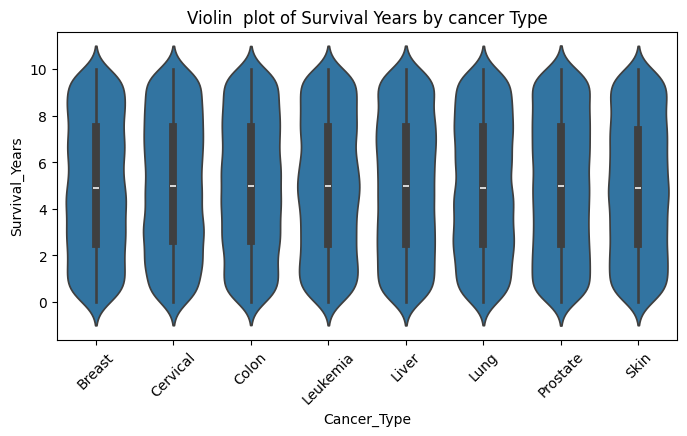

In [17]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df,x='Cancer_Type',y='Survival_Years')
plt.xticks(rotation=45)
plt.title("Violin  plot of Survival Years by cancer Type")
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
target = 'Target_Severity_Score'
features= ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD']
categorical_features= ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

preprocessor=ColumnTransformer(
    transformers=[
        ('num','passthrough',features),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
    ]
)

model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100,random_state=42))
])


X=df[features+categorical_features]
Y=df[target]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=r2_score(Y_test,y_pred)

print(f"R-Squared Score of  A Model  : {score:0.3f}")

R-Squared Score of  A Model  : 0.980
